# Explore Variant Annotations

In [34]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [35]:
import pandas as pd
import cellink as cl
from pathlib import Path
import matplotlib.pyplot as plt
from plotnine import *

In [36]:
DATA = Path("/s/project/sys_gen_students/2024_2025/project04_rare_variant_sc/input_data/")
gdata_path = DATA / "filter_vcf_r08/chr22.dose.filtered.R2_0.8.vcz"
vep_annotation_file = "/s/project/sys_gen_students/2024_2025/project04_rare_variant_sc/input_data/annotations/onek1k1_all_variants_annotated_vep.txt"

In [37]:
package_dir = Path("/data/ouga/home/ag_gagneur/hoev/git/sc-genetics")
gdata_path = package_dir / "tests/data/chr22.dose.filtered.R2_0.8.vcz"
vep_annotation_file = package_dir / "tests/data/variants_vep_annotated.txt"

## Load data as zarr file 

In [38]:
gdata = cl.io.read_sgkit_zarr(gdata_path)
gdata

AnnData object with n_obs × n_vars = 1034 × 143083
    var: 'chrom', 'pos', 'a0', 'a1', 'AF', 'ER2', 'maf', 'R2', 'contig', 'id', 'id_mask', 'quality'
    varm: 'filter'

## Write variants to VCF for annotation 

In [39]:
# cl.io.write_variants_to_vcf(gdata, out_file=package_dir / "tests/data/variants.vcf")
cl.io.write_variants_to_vcf

<function cellink.io._export.write_variants_to_vcf(gdata, out_file='variants.vcf')>

## Annotate variants

### Using VEP 

### run VEP

In [40]:
# cl.tl.run_vep(config_file,
#              input_vcf="variants.vcf",
#              output=anno_file) #writes "variant_vep_annotated.txt"


### add VEP annos gdata 

In [41]:
cl.tl.add_vep_annos_to_gdata(vep_anno_file=vep_annotation_file, gdata=gdata, dummy_consequence=True)
gdata.uns["variant_annotation_vep"]

[2025-02-23 19:08:51,121] INFO:cellink.tl._annotate_snps_genotype_data: Preparing VEP annotations for addition to gdata
[2025-02-23 19:08:51,122] INFO:cellink.tl._annotate_snps_genotype_data: Reading annotation file /data/ouga/home/ag_gagneur/hoev/git/sc-genetics/tests/data/variants_vep_annotated.txt


[2025-02-23 19:08:51,658] INFO:cellink.tl._annotate_snps_genotype_data: Annotation file loaded
[2025-02-23 19:08:51,824] INFO:cellink.tl._annotate_snps_genotype_data: Annotation columns: ['snp_id', 'Location', 'Allele', 'gene_id', 'transcript_id', 'Feature_type', 'Consequence', 'cDNA_position', 'CDS_position', 'Protein_position', 'Amino_acids', 'Codons', 'Existing_variation', 'IMPACT', 'DISTANCE', 'STRAND', 'FLAGS', 'BIOTYPE', 'CANONICAL', 'ENSP', 'SIFT', 'PolyPhen', 'gnomADe_AF', 'gnomADe_AFR_AF', 'gnomADe_AMR_AF', 'gnomADe_ASJ_AF', 'gnomADe_EAS_AF', 'gnomADe_FIN_AF', 'gnomADe_NFE_AF', 'gnomADe_OTH_AF', 'gnomADe_SAS_AF', 'CLIN_SIG', 'SOMATIC', 'PHENO', 'CADD_PHRED', 'CADD_RAW', 'TSSDistance']
[2025-02-23 19:08:55,176] INFO:cellink.tl._annotate_snps_genotype_data: Changing dtype of categorical columns ['chrom', 'pos', 'a0', 'a1', 'gene_id', 'transcript_id', 'gnomADe_AF', 'DISTANCE', 'gnomADe_AMR_AF', 'TSSDistance', 'gnomADe_EAS_AF', 'gnomADe_NFE_AF', 'PolyPhen', 'Amino_acids', 'SOMATIC

,chrom,pos,a0,a1,gene_id,transcript_id,Consequence_3_prime_UTR_variant,Consequence_5_prime_UTR_variant,Consequence_NMD_transcript_variant,Consequence_coding_sequence_variant,...,CADD_RAW,Existing_variation,gnomADe_FIN_AF,Protein_position,IMPACT,CADD_PHRED,gnomADe_OTH_AF,CLIN_SIG,Codons,SIFT
snp_id,,,,,,,,,,,,,,,,,,,,,
22_16849573_A_G,22.0,16849573.0,A,G,-,-,0,0,0,0,...,0.433139,rs112435201,NaN,-,MODIFIER,8.747,NaN,-,-,NaN
22_16849971_A_T,22.0,16849971.0,A,T,-,-,0,0,0,0,...,0.442607,rs7287956,NaN,-,MODIFIER,8.843,NaN,-,-,NaN
22_16850437_G_A,22.0,16850437.0,G,A,-,-,0,0,0,0,...,0.369731,rs5748209,NaN,-,MODIFIER,8.063,NaN,-,-,NaN
22_16851225_C_T,22.0,16851225.0,C,T,-,-,0,0,0,0,...,0.393139,rs5746874,NaN,-,MODIFIER,8.324,NaN,-,-,NaN
22_16851356_C_T,22.0,16851356.0,C,T,-,-,0,0,0,0,...,0.377289,rs5748581,NaN,-,MODIFIER,8.148,NaN,-,-,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22_51211031_A_G,22.0,51211031.0,A,G,ENSG00000079974,ENST00000395593,0,0,0,0,...,0.153297,rs9616968,NaN,-,MODIFIER,5.127,NaN,-,-,NaN
22_51213613_C_T,22.0,51213613.0,C,T,ENSG00000079974,ENST00000395593,0,0,0,0,...,-0.394121,rs34726907,NaN,-,MODIFIER,0.190,NaN,-,-,NaN
22_51213613_C_T,22.0,51213613.0,C,T,ENSG00000184319,ENST00000496652,0,0,0,0,...,-0.394121,rs34726907,NaN,-,MODIFIER,0.190,NaN,-,-,NaN


In [42]:
gdata.uns["variant_annotation_vep"].dtypes

chrom                                              float64
pos                                                float64
a0                                                  object
a1                                                  object
gene_id                                             object
transcript_id                                       object
Consequence_3_prime_UTR_variant                      int64
Consequence_5_prime_UTR_variant                      int64
Consequence_NMD_transcript_variant                   int64
Consequence_coding_sequence_variant                  int64
Consequence_downstream_gene_variant                  int64
Consequence_incomplete_terminal_codon_variant        int64
Consequence_intergenic_variant                       int64
Consequence_intron_variant                           int64
Consequence_mature_miRNA_variant                     int64
Consequence_missense_variant                         int64
Consequence_non_coding_transcript_exon_variant       int

In [43]:
# cl.tl.add_vep_annos_to_gdata(vep_anno_file = package_dir / "tests/data/variants_vep_annotated.txt",
#                                 gdata = gdata,
#                                 dummy_consequence = False)
# gdata.uns["variant_annotation_vep"]

### Combine annotations from different tools 

In [44]:
cl.tl.combine_annotations(gdata, ["vep"])
gdata

[2025-02-23 19:08:56,190] WARNING:cellink.tl._annotate_snps_genotype_data: Function still under development until it can be tested with other annotations


AnnData object with n_obs × n_vars = 1034 × 143083
    var: 'chrom', 'pos', 'a0', 'a1', 'AF', 'ER2', 'maf', 'R2', 'contig', 'id', 'id_mask', 'quality'
    uns: 'variant_annotation_vep', 'variant_annotation'
    varm: 'filter'

In [45]:
gdata.uns["variant_annotation"]

,chrom,pos,a0,a1,gene_id,transcript_id,Consequence_3_prime_UTR_variant,Consequence_5_prime_UTR_variant,Consequence_NMD_transcript_variant,Consequence_coding_sequence_variant,...,CADD_RAW,Existing_variation,gnomADe_FIN_AF,Protein_position,IMPACT,CADD_PHRED,gnomADe_OTH_AF,CLIN_SIG,Codons,SIFT
snp_id,,,,,,,,,,,,,,,,,,,,,
22_16849573_A_G,22.0,16849573.0,A,G,-,-,0,0,0,0,...,0.433139,rs112435201,NaN,-,MODIFIER,8.747,NaN,-,-,NaN
22_16849971_A_T,22.0,16849971.0,A,T,-,-,0,0,0,0,...,0.442607,rs7287956,NaN,-,MODIFIER,8.843,NaN,-,-,NaN
22_16850437_G_A,22.0,16850437.0,G,A,-,-,0,0,0,0,...,0.369731,rs5748209,NaN,-,MODIFIER,8.063,NaN,-,-,NaN
22_16851225_C_T,22.0,16851225.0,C,T,-,-,0,0,0,0,...,0.393139,rs5746874,NaN,-,MODIFIER,8.324,NaN,-,-,NaN
22_16851356_C_T,22.0,16851356.0,C,T,-,-,0,0,0,0,...,0.377289,rs5748581,NaN,-,MODIFIER,8.148,NaN,-,-,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22_51211031_A_G,22.0,51211031.0,A,G,ENSG00000079974,ENST00000395593,0,0,0,0,...,0.153297,rs9616968,NaN,-,MODIFIER,5.127,NaN,-,-,NaN
22_51213613_C_T,22.0,51213613.0,C,T,ENSG00000079974,ENST00000395593,0,0,0,0,...,-0.394121,rs34726907,NaN,-,MODIFIER,0.190,NaN,-,-,NaN
22_51213613_C_T,22.0,51213613.0,C,T,ENSG00000184319,ENST00000496652,0,0,0,0,...,-0.394121,rs34726907,NaN,-,MODIFIER,0.190,NaN,-,-,NaN


## Aggregate to one row per variant 

In [ ]:
print(len(gdata.uns["variant_annotation_vep"].columns))
for agg_type in ["first", "unique_list_max"]:  # "list", "str"]:
    res = cl.tl.aggregate_annotations_for_varm(gdata, "variant_annotation_vep", agg_type=agg_type, return_data=True)
    print(len(res))
    print(len(res.columns))
gdata

59
[2025-02-23 19:08:56,469] INFO:cellink.tl._annotate_snps_genotype_data: Aggregating using method: first


143083
59
[2025-02-23 19:08:56,612] INFO:cellink.tl._annotate_snps_genotype_data: Aggregating using method: unique_list_max
[2025-02-23 19:08:57,201] INFO:cellink.tl._annotate_snps_genotype_data: Columns to aggregate: ['gene_id', 'transcript_id', 'Consequence_3_prime_UTR_variant', 'Consequence_5_prime_UTR_variant', 'Consequence_NMD_transcript_variant', 'Consequence_downstream_gene_variant', 'Consequence_intron_variant', 'Consequence_mature_miRNA_variant', 'Consequence_missense_variant', 'Consequence_non_coding_transcript_exon_variant', 'Consequence_non_coding_transcript_variant', 'Consequence_splice_acceptor_variant', 'Consequence_splice_donor_5th_base_variant', 'Consequence_splice_donor_region_variant', 'Consequence_splice_donor_variant', 'Consequence_splice_polypyrimidine_tract_variant', 'Consequence_splice_region_variant', 'Consequence_stop_gained', 'Consequence_stop_retained_variant', 'Consequence_synonymous_variant', 'Consequence_upstream_gene_variant', 'DISTANCE', 'TSSDistance', 

In [ ]:
cl.tl.aggregate_annotations_for_varm(gdata, "variant_annotation_vep", agg_type="unique_list_max", return_data=True)

In [13]:
gdata.varm["variant_annotation"]

,chrom,pos,a0,a1,gene_id,transcript_id,Consequence_3_prime_UTR_variant,Consequence_5_prime_UTR_variant,Consequence_NMD_transcript_variant,Consequence_coding_sequence_variant,...,CADD_RAW,Existing_variation,gnomADe_FIN_AF,Protein_position,IMPACT,CADD_PHRED,gnomADe_OTH_AF,CLIN_SIG,Codons,SIFT
snp_id,,,,,,,,,,,,,,,,,,,,,
22_16849573_A_G,22.0,16849573.0,A,G,-,-,0,0,0,0,...,0.433139,rs112435201,NaN,-,MODIFIER,8.747,NaN,-,-,NaN
22_16849971_A_T,22.0,16849971.0,A,T,-,-,0,0,0,0,...,0.442607,rs7287956,NaN,-,MODIFIER,8.843,NaN,-,-,NaN
22_16850437_G_A,22.0,16850437.0,G,A,-,-,0,0,0,0,...,0.369731,rs5748209,NaN,-,MODIFIER,8.063,NaN,-,-,NaN
22_16851225_C_T,22.0,16851225.0,C,T,-,-,0,0,0,0,...,0.393139,rs5746874,NaN,-,MODIFIER,8.324,NaN,-,-,NaN
22_16851356_C_T,22.0,16851356.0,C,T,-,-,0,0,0,0,...,0.377289,rs5748581,NaN,-,MODIFIER,8.148,NaN,-,-,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22_51202748_A_G,22.0,51202748.0,A,G,"ENSG00000079974,ENSG00000184319","ENST00000395593,ENST00000496652",0,0,0,0,...,0.550962,rs9616963,NaN,-,MODIFIER,9.870,NaN,-,-,NaN
22_51208568_G_T,22.0,51208568.0,G,T,"ENSG00000184319,ENSG00000079974","ENST00000496652,ENST00000395593",0,0,0,0,...,0.102244,rs148425445,NaN,-,MODIFIER,4.299,NaN,-,-,NaN
22_51211031_A_G,22.0,51211031.0,A,G,"ENSG00000184319,ENSG00000079974","ENST00000496652,ENST00000395593",0,0,0,0,...,0.153297,rs9616968,NaN,-,MODIFIER,5.127,NaN,-,-,NaN


## Test writing

In [14]:
gdata.write("gdata.h5ad")  # test

... storing 'chrom' as categorical
... storing 'a0' as categorical


... storing 'a1' as categorical
... storing 'id' as categorical


## Explore/Plot annotations

In [15]:
anno = cl.tl.aggregate_annotations_for_varm(gdata, "variant_annotation_vep", agg_type="first", return_data=True)
shared_cols = list(set(gdata.var.columns).intersection(anno.columns))
print(shared_cols)
anno = anno.drop(columns=shared_cols)
anno = anno.join(gdata.var)
anno

[2025-02-23 17:48:23,628] INFO:cellink.tl._annotate_snps_genotype_data: Aggregating using method: first
['chrom', 'a1', 'pos', 'a0']


,gene_id,transcript_id,Consequence_3_prime_UTR_variant,Consequence_5_prime_UTR_variant,Consequence_NMD_transcript_variant,Consequence_coding_sequence_variant,Consequence_downstream_gene_variant,Consequence_incomplete_terminal_codon_variant,Consequence_intergenic_variant,Consequence_intron_variant,...,a0,a1,AF,ER2,maf,R2,contig,id,id_mask,quality
snp_id,,,,,,,,,,,,,,,,,,,,,
22_16849573_A_G,-,-,0,0,0,0,0,0,1,0,...,A,G,0.39991,NaN,0.39991,0.85929,0,22:16849573,False,NaN
22_16849971_A_T,-,-,0,0,0,0,0,0,1,0,...,A,T,0.39455,NaN,0.39455,0.88142,0,22:16849971,False,NaN
22_16850437_G_A,-,-,0,0,0,0,0,0,1,0,...,G,A,0.38920,NaN,0.38920,0.90397,0,22:16850437,False,NaN
22_16851225_C_T,-,-,0,0,0,0,0,0,1,0,...,C,T,0.39466,NaN,0.39466,0.89089,0,22:16851225,False,NaN
22_16851356_C_T,-,-,0,0,0,0,0,0,1,0,...,C,T,0.38772,NaN,0.38772,0.90711,0,22:16851356,False,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22_51202748_A_G,ENSG00000079974,ENST00000395593,0,0,0,0,1,0,0,0,...,A,G,0.06811,NaN,0.06811,0.90748,0,22:51202748,False,NaN
22_51208568_G_T,ENSG00000184319,ENST00000496652,0,0,0,0,0,0,0,1,...,G,T,0.06645,NaN,0.06645,0.86887,0,22:51208568,False,NaN
22_51211031_A_G,ENSG00000184319,ENST00000496652,0,0,0,0,0,0,0,1,...,A,G,0.06472,NaN,0.06472,0.85566,0,22:51211031,False,NaN


### histogram for any annotation


In [16]:
anno.columns

Index(['gene_id', 'transcript_id', 'Consequence_3_prime_UTR_variant',
       'Consequence_5_prime_UTR_variant', 'Consequence_NMD_transcript_variant',
       'Consequence_coding_sequence_variant',
       'Consequence_downstream_gene_variant',
       'Consequence_incomplete_terminal_codon_variant',
       'Consequence_intergenic_variant', 'Consequence_intron_variant',
       'Consequence_mature_miRNA_variant', 'Consequence_missense_variant',
       'Consequence_non_coding_transcript_exon_variant',
       'Consequence_non_coding_transcript_variant',
       'Consequence_splice_acceptor_variant',
       'Consequence_splice_donor_5th_base_variant',
       'Consequence_splice_donor_region_variant',
       'Consequence_splice_donor_variant',
       'Consequence_splice_polypyrimidine_tract_variant',
       'Consequence_splice_region_variant', 'Consequence_start_lost',
       'Consequence_stop_gained', 'Consequence_stop_retained_variant',
       'Consequence_synonymous_variant', 'Consequence_ups

<Axes: >

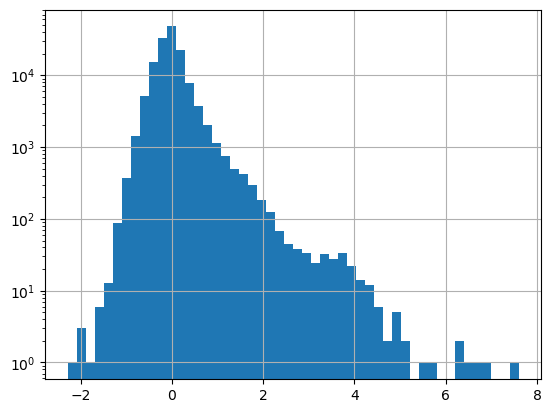

In [17]:
anno["CADD_RAW"].hist(bins=50, log=True)

Text(0.5, 0, 'TSSDistance')

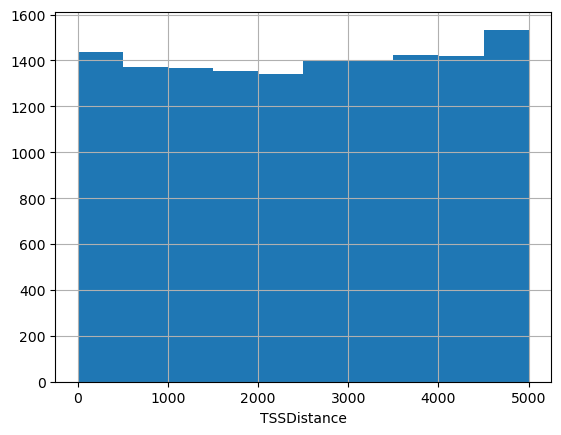

In [18]:
anno["TSSDistance"].dropna().hist()
plt.xlabel("TSSDistance")

In [19]:
# anno.query("Gene != '-'").groupby("Gene").size().hist(log=True, bins=100)
# plt.xlabel("Unique Variants per Gene")

In [20]:
anno["IMPACT"].unique()

array(['MODIFIER', 'MODERATE', 'LOW', 'HIGH'], dtype=object)

In [21]:
vars_to_keep = anno[anno["IMPACT"] == "HIGH"].index

In [22]:
high_impact_count = pd.Series(gdata[:, gdata.var_names.isin(vars_to_keep)].X.sum(axis=1))
high_impact_count.index = gdata.obs.index
high_impact_count.index[high_impact_count.argmax()]

'13_13'

<Axes: >

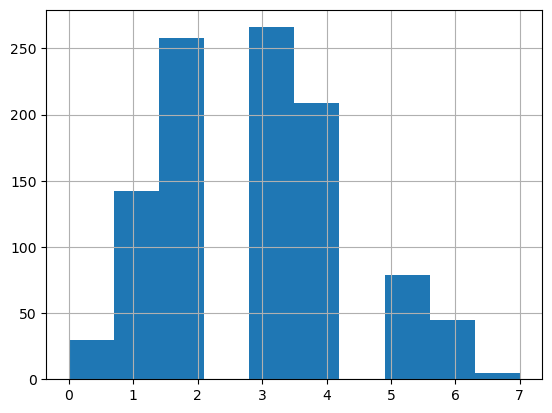

In [ ]:
high_impact_count.hist()